<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/work_from_here/fii_longterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import pandas as pd

In [30]:
import yfinance as yf

In [31]:
# Fetch historical data
start_date = "2014-07-09"


In [32]:
# Convert the Date column to datetime format

df1=pd.read_csv('/content/FIIDII_cash.csv')

df1['Date'] = pd.to_datetime(df1['Date'])

# Download Nifty data from Yahoo Finance
nifty_data = yf.download('^NSEI', start='2014-07-09')

# Reset the index of the Nifty data
nifty_data = nifty_data.reset_index()

# Merge the dataframes based on the Date field
merged_df = pd.merge(df1, nifty_data, left_on='Date', right_on='Date')



[*********************100%***********************]  1 of 1 completed


In [33]:
merged_df['macd']=merged_df['Fii'].ewm(span=50, adjust=False).mean()-merged_df['Fii'].ewm(span=100, adjust=False).mean()
merged_df['signal']=merged_df['macd'].ewm(span=50,adjust=False).mean()
merged_df['signal10']=merged_df['macd'].ewm(span=10,adjust=False).mean()

In [34]:
merged_df['macd_dom']=merged_df['Dii'].ewm(span=20, adjust=False).mean()-merged_df['Dii'].ewm(span=200, adjust=False).mean()
merged_df['signal_dom']=merged_df['Dii'].ewm(span=10,adjust=False).mean()
merged_df['signal_dom_10']=merged_df['Dii'].ewm(span=10,adjust=False).mean()

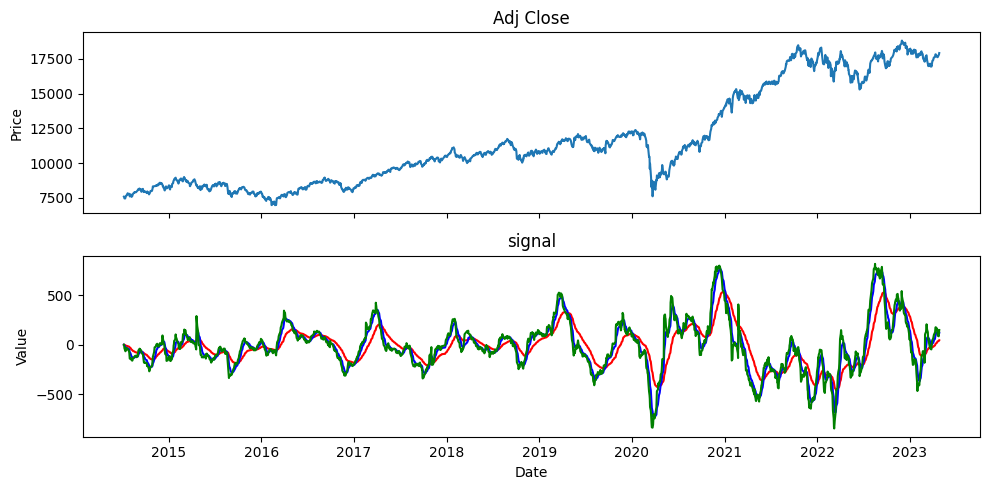

In [35]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,5), sharex=True)

# Plot 'Adj Close' as a time series
ax1.plot(merged_df['Date'], merged_df['Adj Close'], label='Adj Close')
ax1.set_title('Adj Close')
ax1.set_ylabel('Price')

# Plot 'signal_dom_10' as a time series
ax2.plot(merged_df['Date'], merged_df['signal'], label='signal', color='r')
ax2.plot(merged_df['Date'], merged_df['signal10'], label='signal', color='b')
ax2.plot(merged_df['Date'], merged_df['macd'], label='macd', color='g')
ax2.set_title('signal')
ax2.set_xlabel('Date')
ax2.set_ylabel('Value')

# Display the subplots
plt.tight_layout()
plt.show()


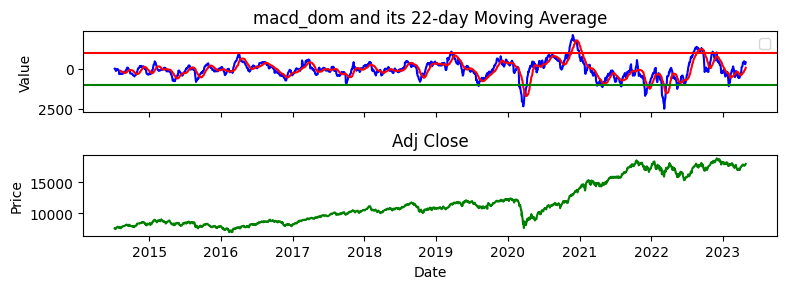

In [41]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,3), sharex=True)
merged_df['macd_dom_22d_ma'] = merged_df['macd_dom'].rolling(window=22).mean()

# Plot 'macd_dom' and its 22-day moving average in the first subplot
ax1.plot(merged_df['Date'], merged_df['macd_dom'], label='macd_dom', color='b')
ax1.plot(merged_df['Date'], merged_df['macd_dom_22d_ma'], label='macd_dom 22d MA', color='r')
ax1.axhline(y=1000,color='g')
ax1.axhline(y=-1000,color='r')
# Invert the y-axis
ax1.invert_yaxis()
ax1.set_title('macd_dom and its 22-day Moving Average')
ax1.set_ylabel('Value')
ax1.legend('')

# Plot 'Adj Close' in the second subplot
ax2.plot(merged_df['Date'], merged_df['Adj Close'], label='Adj Close', color='g')
ax2.set_title('Adj Close')
ax2.set_xlabel('Date')
ax2.set_ylabel('Price')


# Display the subplots
plt.tight_layout()
plt.show()